Importing libraries


In [143]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from IPython.display import HTML

In [59]:
df = pd.read_csv('Frogs_MFCCs.csv')
print(df)
df.count()

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MF

MFCCs_ 1    7195
MFCCs_ 2    7195
MFCCs_ 3    7195
MFCCs_ 4    7195
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
Family      7195
Genus       7195
Species     7195
RecordID    7195
dtype: int64

In [60]:
y = df['Family']
X = df.drop(labels=['Family','Genus','Species','RecordID'], axis=1)
print(X)
print(y)
print(y.unique())

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [62]:
print(X_train)
print(y_train)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
2004  1.000000  0.327476  0.282440  0.572211  0.096509 -0.036705 -0.082174   
1194  1.000000  0.232818 -0.144331 -0.078909 -0.072467  0.255380  0.450215   
5359  0.966443  0.455914  1.000000  0.541650 -0.412873  0.307099  0.235819   
1756  1.000000  0.257873  0.112807  0.527614  0.186094  0.043683 -0.163682   
497   1.000000  0.401859  0.563219  0.578304 -0.126517 -0.058725  0.431806   
...        ...       ...       ...       ...       ...       ...       ...   
3772  1.000000  0.406366  0.268684  0.704863  0.358415  0.055376 -0.159812   
5191  1.000000  0.634337  0.594395  0.403271  0.004960  0.037880 -0.065399   
5226  1.000000  0.756413  0.732319  0.385807 -0.034821  0.073881 -0.058027   
5390  0.931410  0.626137  1.000000  0.375834 -0.223044  0.325943  0.121659   
860   1.000000  0.332793 -0.056006  0.358653  0.508890  0.185081 -0.205522   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [63]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)

LinearSVC()

In [64]:
y_predicted = lin_clf.predict(X_test)
print(y_predicted.shape)
print(y_predicted)

(2159,)
['Leptodactylidae' 'Hylidae' 'Hylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Leptodactylidae']


In [65]:
train_data_Ma = lin_clf.score(X_train,y_train)
print('train_data_Ma = ',train_data_Ma)
test_data_Ma = lin_clf.score(X_test,y_test)
print('test_data_Ma = ',test_data_Ma)

train_data_Ma =  0.9362589356632248
test_data_Ma =  0.9277443260768874


Note = LinearSVC don't have "n_support_" attribute, so if we want that we should use "Linear" kernel of SVC instead.

SVC Linear kernel

In [66]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [67]:
y_predicted_lk = linear_svc.predict(X_test)  # "lk" is stands for 'Linear kernel'

In [68]:
train_data_Ma_lk = linear_svc.score(X_train,y_train)
print('train_data_Ma_lk = ',train_data_Ma_lk)
test_data_Ma_lk = linear_svc.score(X_test,y_test)
print('test_data_Ma_lk = ',test_data_Ma_lk)

train_data_Ma_lk =  0.9453931691818904
test_data_Ma_lk =  0.937007874015748


In [69]:
linear_svc.n_support_

array([ 41, 179, 440, 396])

non-linear svm with softsvm

In [70]:
X_train_val_nls, X_test_nls, y_train_val_nls, y_test_nls = train_test_split(
    X, y, test_size=0.2, random_state=42)  # nls is stands "Not Linear SVM"

X_train_nls, X_val_nls, y_train_nls, y_val_nls = train_test_split(
    X_train_val_nls, y_train_val_nls, test_size=0.3, random_state=42)

In [71]:
print(X_train_nls)
print(y_train_nls)
print(X_val_nls)
print(y_val_nls)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
2875  1.000000  0.204721  0.088500  0.473744  0.184679  0.015349 -0.134023   
4313  1.000000  0.152838  0.175480  0.557519  0.145594  0.017728 -0.171676   
6650  1.000000  0.375320  0.726709  0.233079 -0.152686  0.336269  0.146814   
2294  1.000000  0.183517  0.078300  0.440872  0.175630 -0.047668 -0.200249   
6507  1.000000  0.525100  0.404266  0.257706  0.040817  0.216045  0.053140   
...        ...       ...       ...       ...       ...       ...       ...   
1107  1.000000  0.366276  0.179889  0.399835  0.201200  0.220640  0.279348   
5869  0.987746  0.666994  1.000000  0.827238  0.343675  0.964240 -0.298913   
2838  1.000000  0.448428  0.193492  0.563995  0.259693  0.067070 -0.122421   
160   1.000000  0.550181  0.116074 -0.012733  0.123113  0.217830  0.170377   
6366  0.307415  0.933799  1.000000  0.580911 -0.221001  0.545421  0.088720   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

size of the kernel cache has a strong impact on run times for larger problems.
so we choose it 500 instead of 200 default
also we chose sigmoid kernel arbitrary only for being non linear and then check 
soft svm parameter (C) changes on its svm model.

sigmoid kernel

In [72]:
n_linear_svm = svm.SVC(kernel = 'sigmoid',cache_size=500,C=1 )
n_linear_svm.fit(X_train_nls,y_train_nls)

SVC(C=1, cache_size=500, kernel='sigmoid')

In [73]:
y_val_predicted_nls = n_linear_svm.predict(X_val_nls)
y_predicted_nls = n_linear_svm.predict(X_test_nls)

In [74]:
train_data_Ma_nls = n_linear_svm.score(X_train_nls,y_train_nls)
print('train_data_Ma_nls = ',train_data_Ma_nls)

val_data_Ma_nls = n_linear_svm.score(X_val_nls,y_val_nls)
print('val_data_Ma_nls = ',val_data_Ma_nls)

test_data_Ma_nls = n_linear_svm.score(X_test_nls,y_test_nls)
print('test_data_Ma_nls = ',test_data_Ma_nls)

train_data_Ma_nls =  0.7349218168279971
val_data_Ma_nls =  0.7295888824551245
test_data_Ma_nls =  0.73453787352328


In [134]:
n_linear_svm.n_support_

array([ 37, 167, 640, 592])

now check a different values of C in validation model arbitrary

In [75]:
y_val_predicted_nls_FDC = []  # FDC stands for "For Different C"
val_data_Ma_nls_FDC = []
C_range = np.arange(0.2,99.2,1.)
for c in C_range:
    n_linear_svm = svm.SVC(kernel = 'sigmoid',cache_size=500,C = c )
    n_linear_svm.fit(X_train_nls,y_train_nls)
    y_val_predicted_nls_FDC.append(n_linear_svm.predict(X_val_nls))
    val_data_Ma_nls_FDC.append(n_linear_svm.score(X_val_nls,y_val_nls)) 
   


Define the best model

In [156]:
val_data_nls_BMA_index = np.argmax(val_data_Ma_nls_FDC) # "BMA" is stands for "Best Mean Accuracy" 
sig_BMA = val_data_Ma_nls_FDC [val_data_nls_BMA_index]
sig_BC = C_range[val_data_nls_BMA_index]
print('Best C is = ',sig_BC)
print('val_data_nls_BMA is = ',sig_BMA)

Best C is =  0.2
val_data_nls_BMA is =  0.80833815865663


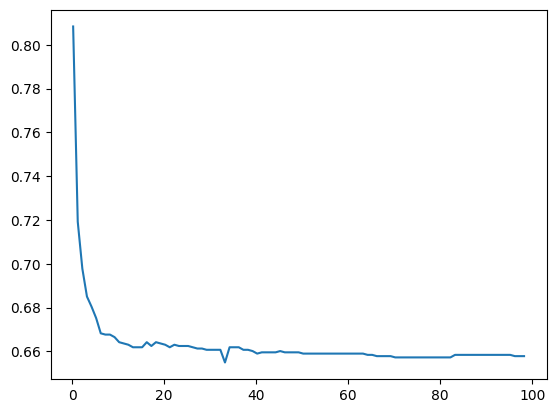

In [77]:
plt.plot(C_range,val_data_Ma_nls_FDC)

In [174]:
n_linear_svm_best = svm.SVC(kernel = 'sigmoid',cache_size=500,C=sig_BC )
n_linear_svm_best.fit(X_train_nls,y_train_nls)
y_predicted_nls_BMA = n_linear_svm_best.predict(X_test_nls)
train_data_nls_BMA = n_linear_svm_best.score(X_train_nls,y_train_nls) 
print('train_data_nls_BMA = ',train_data_nls_BMA)
test_data_nls_BMA = n_linear_svm_best.score(X_test_nls,y_test_nls)
print('test_data_nls_BMA = ',test_data_nls_BMA)

train_data_nls_BMA =  0.7972201538843385
test_data_nls_BMA =  0.8158443363446838


In [79]:
n_linear_svm_best.n_support_

array([ 37, 303, 958, 935])

In [80]:
d = {'linear_svc_n_support_' : [linear_svc.n_support_], \
      'n_linear_svm_best_n_support_' : [n_linear_svm_best.n_support_]}
comp_n_supp_df = pd.DataFrame(data=d)
display(comp_n_supp_df)

,linear_svc_n_support_,n_linear_svm_best_n_support_
0,"[41, 179, 440, 396]","[37, 303, 958, 935]"


rbf kernel

In [103]:
rbf_svm = svm.SVC(kernel = 'rbf',cache_size=500,C=1 )
rbf_svm.fit(X_train_nls,y_train_nls)

SVC(C=1, cache_size=500)

In [104]:
y_val_predicted_rbf = rbf_svm.predict(X_val_nls)
y_predicted_rbf = rbf_svm.predict(X_test_nls)

In [105]:
train_data_Ma_nls_rbf = rbf_svm.score(X_train_nls,y_train_nls)
print('train_data_Ma_nls_rbf = ',train_data_Ma_nls_rbf)

val_data_Ma_nls_rbf = rbf_svm.score(X_val_nls,y_val_nls)
print('val_data_Ma_nls_rbf = ',val_data_Ma_nls_rbf)

test_data_Ma_nls_rbf = rbf_svm.score(X_test_nls,y_test_nls)
print('test_data_Ma_nls_rbf = ',test_data_Ma_nls_rbf)

train_data_Ma_nls_rbf =  0.9756763464879623
val_data_Ma_nls_rbf =  0.9826288361320209
test_data_Ma_nls_rbf =  0.9728978457261988


In [135]:
rbf_svm.n_support_

array([ 12,  38, 123,  86])

In [106]:
y_val_predicted_nls_rbf_FDC = []  # FDC stands for "For Different C"
val_data_Ma_nls_rbf_FDC = []
C_range = np.arange(0.2,99.2,1.)
for c in C_range:
    rbf_svm = svm.SVC(kernel = 'rbf',cache_size=500,C = c )
    rbf_svm.fit(X_train_nls,y_train_nls)
    y_val_predicted_nls_rbf_FDC.append(rbf_svm.predict(X_val_nls))
    val_data_Ma_nls_rbf_FDC.append(rbf_svm.score(X_val_nls,y_val_nls)) 
   


In [162]:
val_data_nls_rbf_BMA_index = np.argmax(val_data_Ma_nls_rbf_FDC) # "BMA" is stands for "Best Mean Accuracy" 
BMA_S_rbf = val_data_Ma_nls_rbf_FDC [val_data_nls_rbf_BMA_index]
BC_S_rbf = C_range[val_data_nls_rbf_BMA_index]
print('Best C is = ',BC_S_rbf)
print('val_data_nls_rbf_BMA is = ',BMA_S_rbf)

Best C is =  48.2
val_data_nls_rbf_BMA is =  0.9918934568616097


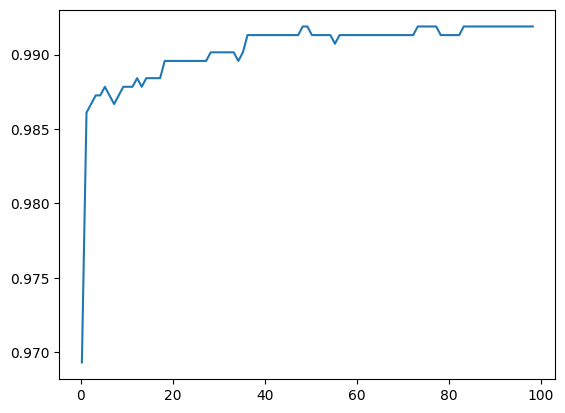

In [108]:
plt.plot(C_range,val_data_Ma_nls_rbf_FDC)

In [175]:
rbf_svm_best = svm.SVC(kernel = 'rbf',cache_size=500,C=BC_S_rbf )

rbf_svm_best.fit(X_train_nls,y_train_nls)

y_predicted_nls_rbf_BMA = rbf_svm_best.predict(X_test_nls)


train_data_nls_rbf_BMA = rbf_svm_best.score(X_train_nls,y_train_nls) 
print('train_data_nls_rbf_BMA = ',train_data_nls_rbf_BMA)
test_data_nls_rbf_BMA = rbf_svm_best.score(X_test_nls,y_test_nls)
print('test_data_nls_rbf_BMA = ',test_data_nls_rbf_BMA)

train_data_nls_rbf_BMA =  0.998758997269794
test_data_nls_rbf_BMA =  0.9895760945100764


In [110]:
rbf_svm_best.n_support_

array([ 14,  42, 133,  92])

poly kernel

In [111]:
poly_svm = svm.SVC(kernel = 'poly',cache_size=500,C=1 )
poly_svm.fit(X_train_nls,y_train_nls)

SVC(C=1, cache_size=500, kernel='poly')

In [112]:
y_val_predicted_poly = poly_svm.predict(X_val_nls)
y_predicted_poly = poly_svm.predict(X_test_nls)

In [113]:
train_data_Ma_nls_poly = poly_svm.score(X_train_nls,y_train_nls)
print('train_data_Ma_nls_poly = ',train_data_Ma_nls_poly)

val_data_Ma_nls_poly = poly_svm.score(X_val_nls,y_val_nls)
print('val_data_Ma_nls_poly = ',val_data_Ma_nls_poly)

test_data_Ma_nls_poly = poly_svm.score(X_test_nls,y_test_nls)
print('test_data_Ma_nls_poly = ',test_data_Ma_nls_poly)

train_data_Ma_nls_poly =  0.9754281459419211
val_data_Ma_nls_poly =  0.9803126809496236
test_data_Ma_nls_poly =  0.9715079916608756


In [136]:
poly_svm.n_support_

array([ 10,  38, 114,  81])

In [114]:
y_val_predicted_nls_poly_FDC = []  # FDC stands for "For Different C"
val_data_Ma_nls_poly_FDC = []
C_range = np.arange(0.2,99.2,1.)
for c in C_range:
    poly_svm = svm.SVC(kernel = 'poly',cache_size=500,C = c )
    poly_svm.fit(X_train_nls,y_train_nls)
    y_val_predicted_nls_poly_FDC.append(poly_svm.predict(X_val_nls))
    val_data_Ma_nls_poly_FDC.append(poly_svm.score(X_val_nls,y_val_nls)) 

In [165]:
val_data_nls_poly_BMA_index = np.argmax(val_data_Ma_nls_poly_FDC) # "BMA" is stands for "Best Mean Accuracy" 
BMA_s_poly = val_data_Ma_nls_poly_FDC [val_data_nls_poly_BMA_index]
BC_s_poly = C_range[val_data_nls_poly_BMA_index]
print('Best C is = ',BC_s_poly)
print('val_data_nls_poly_BMA is = ',BMA_s_poly)

Best C is =  13.2
val_data_nls_poly_BMA is =  0.9895773016792125


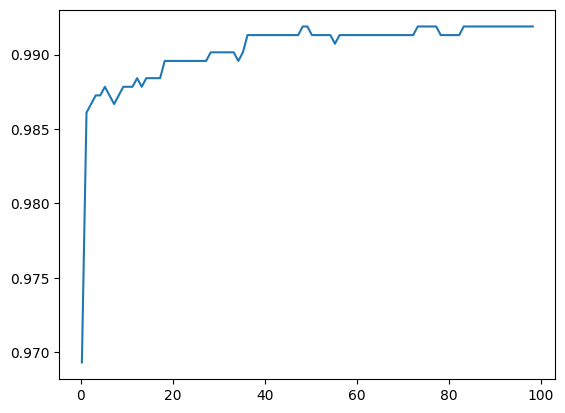

In [116]:
plt.plot(C_range,val_data_Ma_nls_rbf_FDC)

In [176]:
poly_svm_best = svm.SVC(kernel = 'poly',cache_size=500,C=BC_s_poly )

poly_svm_best.fit(X_train_nls,y_train_nls)

y_predicted_nls_poly_BMA = poly_svm_best.predict(X_test_nls)


train_data_nls_poly_BMA = poly_svm_best.score(X_train_nls,y_train_nls) 
print('train_data_nls_poly_BMA = ',train_data_nls_poly_BMA)
test_data_nls_poly_BMA = poly_svm_best.score(X_test_nls,y_test_nls)
print('test_data_nls_poly_BMA = ',test_data_nls_poly_BMA)

train_data_nls_poly_BMA =  0.9965251923554231
test_data_nls_poly_BMA =  0.985406532314107


In [118]:
poly_svm_best.n_support_

array([ 22,  47, 143, 109])

last part (4-fold cross validation of the previous part)

In [126]:
parameters = [{'kernel': ['rbf'],
                'C': np.arange(0.2,24.2,1.)}]
rbf_FDC_CV_best = GridSearchCV(svm.SVC(kernel='rbf',decision_function_shape='ovr'), parameters,cv=4)
rbf_FDC_CV_best.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid=[{'C': array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
       11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
       22.2, 23.2]),
                          'kernel': ['rbf']}])

In [129]:
print(rbf_FDC_CV_best.best_params_)
y_predicted_nls_rbf_CV = rbf_FDC_CV_best.predict(X_test)

train_data_nls_rbf_CV = rbf_FDC_CV_best.score(X_train,y_train) 
print('train_data_nls_rbf_CV = ',train_data_nls_rbf_CV)
test_data_nls_rbf_CV = rbf_FDC_CV_best.score(X_test,y_test)
print('test_data_nls_rbf_CV = ',test_data_nls_rbf_CV)

{'C': 18.2, 'kernel': 'rbf'}
train_data_nls_rbf_CV =  0.9978157267672756
test_data_nls_rbf_CV =  0.9884205650764243


In [130]:
rbf_FDC_CV_best.best_estimator_.n_support_

array([ 20,  56, 163, 114])

In [131]:
parameters = [{'kernel': ['poly'],
                'C': np.arange(0.2,24.2,1.)}]
poly_FDC_CV_best = GridSearchCV(svm.SVC(kernel='poly',decision_function_shape='ovr'), parameters,cv=4)
poly_FDC_CV_best.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='poly'),
             param_grid=[{'C': array([ 0.2,  1.2,  2.2,  3.2,  4.2,  5.2,  6.2,  7.2,  8.2,  9.2, 10.2,
       11.2, 12.2, 13.2, 14.2, 15.2, 16.2, 17.2, 18.2, 19.2, 20.2, 21.2,
       22.2, 23.2]),
                          'kernel': ['poly']}])

In [132]:
print(poly_FDC_CV_best.best_params_)
y_predicted_nls_poly_CV = poly_FDC_CV_best.predict(X_test)

train_data_nls_poly_CV = poly_FDC_CV_best.score(X_train,y_train) 
print('train_data_nls_poly_CV = ',train_data_nls_poly_CV)

test_data_nls_poly_CV = poly_FDC_CV_best.score(X_test,y_test)
print('test_data_nls_poly_CV = ',test_data_nls_poly_CV)

{'C': 23.2, 'kernel': 'poly'}
train_data_nls_poly_CV =  0.9984114376489277
test_data_nls_poly_CV =  0.9888837424733673


In [133]:
poly_FDC_CV_best.best_estimator_.n_support_

array([ 18,  45, 148, 104])

Table of Models Comparision

In [178]:
d_TMC = {'kernel':["Best_C","N(SVM's)","train","val","test"],\
    'LinearSVC' : [1, 'not avalible', train_data_Ma, '-', test_data_Ma],\
      'linear':[1,linear_svc.n_support_, train_data_Ma_lk, '-', test_data_Ma_lk],\
        'sigmoid':[1, n_linear_svm.n_support_, train_data_Ma_nls, val_data_Ma_nls, test_data_Ma_nls],\
            'soft+sigmoid': [sig_BC, n_linear_svm_best.n_support_, train_data_nls_BMA,sig_BMA,test_data_nls_BMA],\
                'rbf':[1, rbf_svm.n_support_, train_data_Ma_nls_rbf, val_data_Ma_nls_rbf, test_data_Ma_nls_rbf],\
                    'rbf+soft': [BC_S_rbf, rbf_svm_best.n_support_, train_data_nls_rbf_BMA, BMA_S_rbf, test_data_nls_rbf_BMA],\
                        'poly': [1, poly_svm.n_support_, train_data_Ma_nls_poly, val_data_Ma_nls_poly, test_data_Ma_nls_poly],\
                            'poly+soft': [BC_s_poly, poly_svm_best.n_support_, train_data_nls_poly_BMA, BMA_s_poly, test_data_nls_poly_BMA],\
                                '4fold_rbf': [rbf_FDC_CV_best.best_params_['C'], rbf_FDC_CV_best.best_estimator_.n_support_, train_data_nls_rbf_CV,'-', test_data_nls_rbf_CV],\
                                   '4fold_poly' : [poly_FDC_CV_best.best_params_['C'], poly_FDC_CV_best.best_estimator_.n_support_, train_data_nls_poly_CV, '-', test_data_nls_poly_CV]}
TMC = pd.DataFrame(data = d_TMC)
# def some_function():
#     df['kernel'] = [f'<b>{x}</b>' for x in df['kernel']]
#     return df.to_html()
HTML(TMC.to_html(index=False))

kernel,LinearSVC,linear,sigmoid,soft+sigmoid,rbf,rbf+soft,poly,poly+soft,4fold_rbf,4fold_poly
Best_C,1,1,1,0.2,1,48.2,1,13.2,18.2,23.2
N(SVM's),not avalible,"[41, 179, 440, 396]","[37, 167, 640, 592]","[37, 303, 958, 935]","[12, 38, 123, 86]","[14, 42, 133, 92]","[10, 38, 114, 81]","[22, 47, 143, 109]","[20, 56, 163, 114]","[18, 45, 148, 104]"
train,0.936259,0.945393,0.734922,0.79722,0.975676,0.998759,0.975428,0.996525,0.997816,0.998411
val,-,-,0.729589,0.808338,0.982629,0.991893,0.980313,0.989577,-,-
test,0.927744,0.937008,0.734538,0.815844,0.972898,0.989576,0.971508,0.985407,0.988421,0.988884
